<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


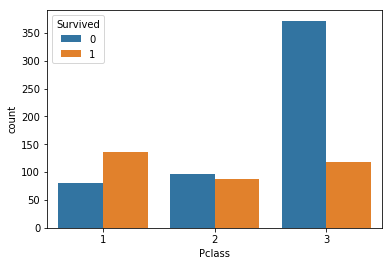

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#panda is a read/write tool

train_file = "c:\\titanic\\train.csv"
test_file = "c:\\titanic\\test.csv"
submit_file = "c:\\titanic\\submission.csv"

# comma delimited is the default
tiData = pd.read_csv(train_file, header = 0)
tiTest = pd.read_csv(test_file, header = 0)

# print the srvived data from n to m
#print(tiDataSet.Survived[10:23])
#print(tiDataSet.Pclass[10:23])

tiData.info()
tiData.describe()

tiData.loc[tiData['Sex']=='male','Sex'] = 0
tiData.loc[tiData['Sex']=='female','Sex'] = 1

#sns.countplot(tiData['Pclass'], hue=tiData['Survived'])
#sns.countplot(tiData['Sex'], hue=tiData['Survived'])
sns.countplot(tiData['Pclass'], hue=tiData['Survived'])

predictions = tiTest

predictions.loc[tiTest['Sex']=='male','Survived'] = '0'
predictions.loc[tiTest['Sex']=='female','Survived'] = '1'
predictions.loc[tiTest['Pclass']==1,'Survived'] = '1'

submission = pd.DataFrame({
        "PassengerId": predictions["PassengerId"],
        "Survived": predictions["Survived"]
    })

submission.to_csv(submit_file, index=False)